In [1]:
import pickle

from helpers import *
from models import *
from grid_and_CV import *
from surprise.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
seed = 1
load_models = True # If False, will run them instead (takes time!)

## Load and explore data

In [3]:
train_path = "data/data_train.csv"
test_path = "data/data_test.csv"

In [4]:
# training data
data = load_data(train_path)
# submission data
data_to_predict = load_data(test_path)

Rates per user:
min: 3
max: 522
mean: 117.6952

Rates per movie:
min: 8
max: 4590
mean: 1176.952


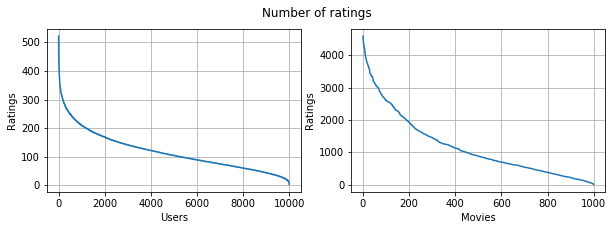

In [5]:
fig_folder = 'figures/'
explore_data(data, fig_folder)

## Prepare the format of the data

In [6]:
# get data ready for Surprise format
data_surprise = transform_surprise(data)
train, test = train_test_split(data_surprise, test_size=0.1, random_state=2)

final_train = data_surprise.build_full_trainset()

final_test = transform_surprise(data_to_predict)
final_test = final_test.build_full_trainset().build_testset()
final_test = sorted(final_test, key=lambda x: (x[1], x[0]))

In [7]:
# format for ALS and SGD:
train_matrix = sparse_matrix(train)
final_train_matrix = sparse_matrix(final_train)
test_matrix = separate_indices(test)
final_test_matrix = separate_indices(final_test)

In [8]:
# the ratings of the test set
test_ratings = test_matrix[2]

## Run or load the models

In [9]:
if load_models:
    
    prediction_ALS = pickle.load(open('models/prediction_ALS.pkl', 'rb'))
    prediction_SGD = pickle.load(open('models/prediction_SGD.pkl', 'rb'))
    prediction_baseline = pickle.load(open('models/prediction_baseline.pkl', 'rb'))
    prediction_baseline_user = pickle.load(open('models/prediction_baseline_user.pkl', 'rb'))
    prediction_baseline_item = pickle.load(open('models/prediction_baseline_item.pkl', 'rb'))
    prediction_basicKNN = pickle.load(open('models/prediction_basicKNN.pkl', 'rb'))
    prediction_meansKNN = pickle.load(open('models/prediction_meansKNN.pkl', 'rb'))
    prediction_zscore_item = pickle.load(open('models/prediction_zscore_item.pkl', 'rb'))
    prediction_SVD = pickle.load(open('models/prediction_SVD.pkl', 'rb'))
    prediction_SVDpp = pickle.load(open('models/prediction_SVDpp.pkl', 'rb'))
    prediction_NMF = pickle.load(open('models/prediction_NMF.pkl', 'rb'))
    prediction_slopeOne = pickle.load(open('models/prediction_slopeOne.pkl', 'rb'))

    final_prediction_ALS = pickle.load(open('final_models/prediction_ALS.pkl', 'rb'))
    final_prediction_SGD = pickle.load(open('final_models/prediction_SGD.pkl', 'rb'))
    final_prediction_baseline = pickle.load(open('final_models/prediction_baseline.pkl', 'rb'))
    final_prediction_baseline_user = pickle.load(open('final_models/prediction_baseline_user.pkl', 'rb'))
    final_prediction_baseline_item = pickle.load(open('final_models/prediction_baseline_item.pkl', 'rb'))
    final_prediction_basicKNN = pickle.load(open('final_models/prediction_basicKNN.pkl', 'rb'))
    final_prediction_meansKNN = pickle.load(open('final_models/prediction_meansKNN.pkl', 'rb'))
    final_prediction_zscore_item = pickle.load(open('final_models/prediction_zscore_item.pkl', 'rb'))
    final_prediction_SVD = pickle.load(open('final_models/prediction_SVD.pkl', 'rb'))
    final_prediction_SVDpp = pickle.load(open('final_models/prediction_SVDpp.pkl', 'rb'))
    final_prediction_NMF = pickle.load(open('final_models/prediction_NMF.pkl', 'rb'))
    final_prediction_slopeOne = pickle.load(open('final_models/prediction_slopeOne.pkl', 'rb'))

else:
    
    # Parameters for ALS and SGD, chosen with grid search:
    num_features = 40
    lambda_user = 0.1
    lambda_movie = 0.1
    stop_criterion = 1e-4
    gamma = 0.01 # only SGD
    
    # Parameter for SVD and SVDpp, chosen with grid search:
    rate = 0.001
    
    prediction_ALS = ALS(train_matrix, test_matrix, num_features, lambda_user, lambda_movie, stop_criterion)
    prediction_SGD = SGD(train_matrix, test_matrix, num_features, lambda_user, lambda_movie, gamma, stop_criterion)
    prediction_baseline = baseline(train, test)
    prediction_baseline_user = baselineKNN_user(train, test)
    prediction_baseline_item = baselineKNN_item(train, test)
    prediction_basicKNN = basicKNN(train, test)
    prediction_meansKNN = meansKNN(train, test)
    prediction_zscore_item = zscoreKNN_item(train, test) # zscore_user is also implemented, but shows the same result
    prediction_SVD = SVD(train, test, rate)
    prediction_SVDpp = SVDpp(train, test, rate)
    prediction_NMF = NMF(train, test)
    prediction_slopeOne = slopeOne(train, test)
    
    final_prediction_ALS = ALS(final_train_matrix, final_test_matrix, num_features, lambda_user, lambda_movie, stop_criterion)
    final_prediction_SGD = SGD(final_train_matrix, final_test_matrix, num_features, lambda_user, lambda_movie, gamma, stop_criterion)
    final_prediction_baseline = baseline(final_train, final_test)
    final_prediction_baseline_user = baselineKNN_user(final_train, final_test)
    final_prediction_baseline_item = baselineKNN_item(final_train, final_test)
    final_prediction_basicKNN = basicKNN(final_train, final_test)
    final_prediction_meansKNN = meansKNN(final_train, final_test)
    final_prediction_zscore_item = zscoreKNN_item(final_train, final_test) 
    final_prediction_SVD = SVD(final_train, final_test, rate)
    final_prediction_SVDpp = SVDpp(final_train, final_test, rate)
    final_prediction_NMF = NMF(final_train, final_test)
    final_prediction_slopeOne = slopeOne(final_train, final_test)
    
    pickle.dump(prediction_ALS, open('models/prediction_ALS.pkl', 'wb'))
    pickle.dump(prediction_SGD, open('models/prediction_SGD.pkl', 'wb'))
    pickle.dump(prediction_baseline, open('models/prediction_baseline.pkl', 'wb'))
    pickle.dump(prediction_baseline_user, open('models/prediction_baseline_user.pkl', 'wb'))
    pickle.dump(prediction_baseline_item, open('models/prediction_baseline_item.pkl', 'wb'))
    pickle.dump(prediction_basicKNN, open('models/prediction_basicKNN.pkl', 'wb'))
    pickle.dump(prediction_meansKNN, open('models/prediction_meansKNN.pkl', 'wb'))
    pickle.dump(prediction_zscore_item, open('models/prediction_zscore_item.pkl', 'wb'))
    pickle.dump(prediction_SVD, open('models/prediction_SVD.pkl', 'wb'))
    pickle.dump(prediction_SVDpp, open('models/prediction_SVDpp.pkl', 'wb'))
    pickle.dump(prediction_NMF, open('models/prediction_NMF.pkl', 'wb'))
    pickle.dump(prediction_slopeOne, open('models/prediction_slopeOne.pkl', 'wb'))

    pickle.dump(final_prediction_ALS, open('final_models/prediction_ALS.pkl', 'wb'))
    pickle.dump(final_prediction_SGD, open('final_models/prediction_SGD.pkl', 'wb'))
    pickle.dump(final_prediction_baseline, open('final_models/prediction_baseline.pkl', 'wb'))
    pickle.dump(final_prediction_baseline_user, open('final_models/prediction_baseline_user.pkl', 'wb'))
    pickle.dump(final_prediction_baseline_item, open('final_models/prediction_baseline_item.pkl', 'wb'))
    pickle.dump(final_prediction_basicKNN, open('final_models/prediction_basicKNN.pkl', 'wb'))
    pickle.dump(final_prediction_meansKNN, open('final_models/prediction_meansKNN.pkl', 'wb'))
    pickle.dump(final_prediction_zscore_item, open('final_models/prediction_zscore_item.pkl', 'wb'))
    pickle.dump(final_prediction_SVD, open('final_models/prediction_SVD.pkl', 'wb'))
    pickle.dump(final_prediction_SVDpp, open('final_models/prediction_SVDpp.pkl', 'wb'))
    pickle.dump(final_prediction_NMF, open('final_models/prediction_NMF.pkl', 'wb'))
    pickle.dump(final_prediction_slopeOne, open('final_models/prediction_slopeOne.pkl', 'wb'))

## Model blending

In [10]:
# training set
models = [prediction_ALS, prediction_SGD, prediction_baseline, prediction_baseline_user, prediction_baseline_item, prediction_basicKNN, prediction_meansKNN, prediction_zscore_item, prediction_SVD, prediction_SVDpp, prediction_NMF, prediction_slopeOne]

blending = np.zeros(models[0].shape) # initialize
for m in models:
    blending = np.vstack((blending, m))
blending = np.delete(blending, 0, axis=0) # remove initialization
blending = np.transpose(blending)

In [11]:
# final set
final_models = [final_prediction_ALS, final_prediction_SGD, final_prediction_baseline, final_prediction_baseline_user, final_prediction_baseline_item, final_prediction_basicKNN, final_prediction_meansKNN, final_prediction_zscore_item, final_prediction_SVD, final_prediction_SVDpp, final_prediction_NMF, final_prediction_slopeOne]

final_blending = np.zeros(final_models[0].shape) # initialize
for m in final_models:
    final_blending = np.vstack((final_blending, m))
final_blending = np.delete(final_blending, 0, axis=0) # remove initialization
final_blending = np.transpose(final_blending)

In [12]:
# polynomial expansion
degree = 2
blending_poly, final_blending_poly = polynomial_features(blending, final_blending, degree)

In [13]:
# establish weights for each model
ridge = True

if ridge:
    final_result = ridge_regression(blending_poly, test_ratings, final_blending_poly, seed)
else:
    epochs = 100
    patience = 15
    final_result = neural_net(blending_poly, np.array(test_ratings), final_blending_poly, epochs, patience)

## Submission!

In [14]:
submission_path = 'final_submission_test.csv'
create_submission(final_result, test_path, submission_path)